In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


### Preprocessing Data

In [16]:
def preprocess(dataframe_data, label_mapping):
    dataframe_data['label'] = dataframe_data['label'].replace(label_mapping)
    y = dataframe_data['label'].values
    x = dataframe_data.drop(['label'], axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test
    

In [17]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('emotions.csv')
#df

In [18]:
#df['label'].value_counts()
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [19]:
df['label'].value_counts()
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [20]:
X_train, X_test, y_train, y_test = preprocess(df, label_mapping)
#len(X_train), len(X_test)

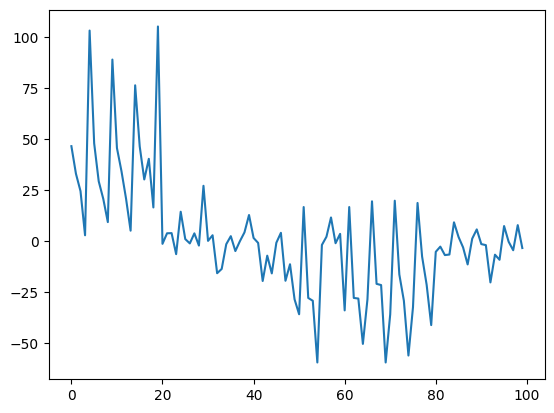

In [21]:
plt.plot(X_train[0, 100:200])

### Model Training

In [22]:
import sklearn.svm as SVC
import sklearn.tree as tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [23]:
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
model_tree.score(X_test, y_test)

0.9601873536299765

In [24]:
model_svm = SVC.SVC()
model_svm.fit(X_train, y_train)
model_svm.score(X_test, y_test)

0.3840749414519906

In [25]:
# XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.9976580796252927

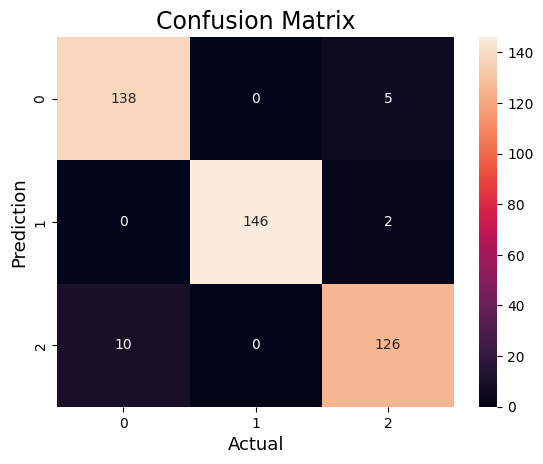

In [26]:
# confusion matrix
y_pred = model_tree.predict(X_test)
# plot confusion matrix
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


### Test Model